In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv("unnati_phase1_data_revised.csv")

In [10]:
#Date Preprocessing
print("Before preprocessing")
print(df.dtypes)
df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'],format="mixed")
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
print("After Preprocessing")
print(df.dtypes)


Before preprocessing
Alert       object
Date        object
Time        object
Lat        float64
Long       float64
Vehicle      int64
Speed        int64
dtype: object
After Preprocessing
Alert              object
Date       datetime64[ns]
Time       datetime64[ns]
Lat               float64
Long              float64
Vehicle             int64
Speed               int64
dtype: object


In [11]:
print("Before Feature Enginerring")
df.head()

Before Feature Enginerring


,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,1900-01-01 05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,1900-01-01 05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,1900-01-01 05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,1900-01-01 05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,1900-01-01 05:38:08,12.901594,80.092538,2846,58


In [12]:
#Feature Engineering
df['day_name'] = df['Date'].dt.day_name()
time_periods = [0,2,4,6,8,10,12,14,16,18,20,22,24]
labels = ['0-2', '2-4', '4-6', '6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24']
df['time_label'] = pd.cut(df['Time'].dt.hour, bins=time_periods, labels=labels, right=False)
print("After Feature Engineering")
df.head()

After Feature Engineering


,Alert,Date,Time,Lat,Long,Vehicle,Speed,day_name,time_label
0,cas_ldw,2022-06-01,1900-01-01 05:36:36,12.887403,80.083412,2846,48,Wednesday,4-6
1,cas_ldw,2022-06-01,1900-01-01 05:36:47,12.892586,80.085794,2846,58,Wednesday,4-6
2,cas_ldw,2022-06-01,1900-01-01 05:37:04,12.894932,80.087564,2846,57,Wednesday,4-6
3,cas_ldw,2022-06-01,1900-01-01 05:37:31,12.898267,80.090062,2846,49,Wednesday,4-6
4,cas_ldw,2022-06-01,1900-01-01 05:38:08,12.901594,80.092538,2846,58,Wednesday,4-6


In [14]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Select the columns you want to use for clustering
# Example features: 'speed', 'latitude', 'longitude', 'day_name', 'time_label'

# Create a preprocessing pipeline
numeric_features = ['Speed', 'Lat', 'Long']
categorical_features = ['day_name', 'time_label','Alert']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the K-Means clustering model
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters

# Create a pipeline for preprocessing and clustering
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', kmeans)])

# Fit the pipeline to your data
X = df[['Speed', 'Lat', 'Long', 'day_name', 'time_label','Alert']]  # Select the features
pipeline.fit(X)

# Get cluster labels for each data point
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Add cluster labels to your DataFrame
df['cluster'] = cluster_labels
df.head()
# Now, 'cluster' column in your DataFrame contains the cluster assignments for each data point


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Alert,Date,Time,Lat,Long,Vehicle,Speed,day_name,time_label,cluster
0,cas_ldw,2022-06-01,1900-01-01 05:36:36,12.887403,80.083412,2846,48,Wednesday,4-6,0
1,cas_ldw,2022-06-01,1900-01-01 05:36:47,12.892586,80.085794,2846,58,Wednesday,4-6,0
2,cas_ldw,2022-06-01,1900-01-01 05:37:04,12.894932,80.087564,2846,57,Wednesday,4-6,0
3,cas_ldw,2022-06-01,1900-01-01 05:37:31,12.898267,80.090062,2846,49,Wednesday,4-6,0
4,cas_ldw,2022-06-01,1900-01-01 05:38:08,12.901594,80.092538,2846,58,Wednesday,4-6,0


In [ ]:
#Analysis

           count       mean        std  min   25%   50%   75%   max
Alert                                                              
cas_fcw    590.0  36.366102  14.121527  0.0  29.0  37.0  46.0  63.0
cas_hmw  12328.0  35.316596  14.888884  0.0  26.0  37.0  46.0  64.0
cas_ldw   6431.0  50.923496  11.909772  0.0  49.0  56.0  58.0  65.0
cas_pcw   1976.0  17.527328  12.352472  0.0   9.0  17.0  25.0  61.0


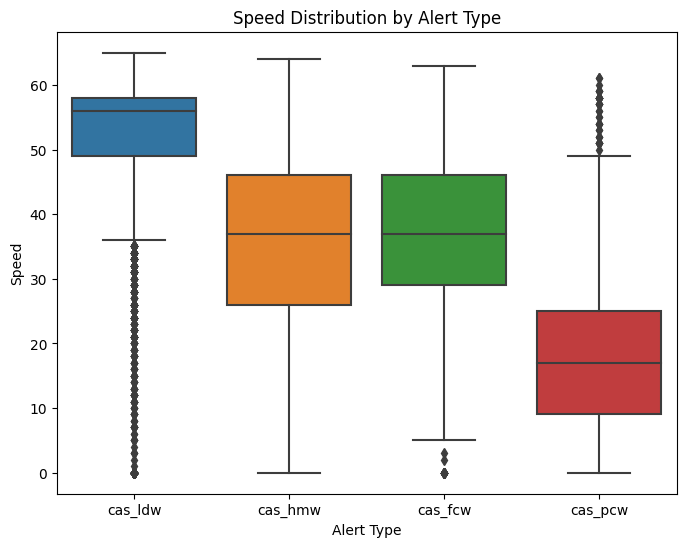

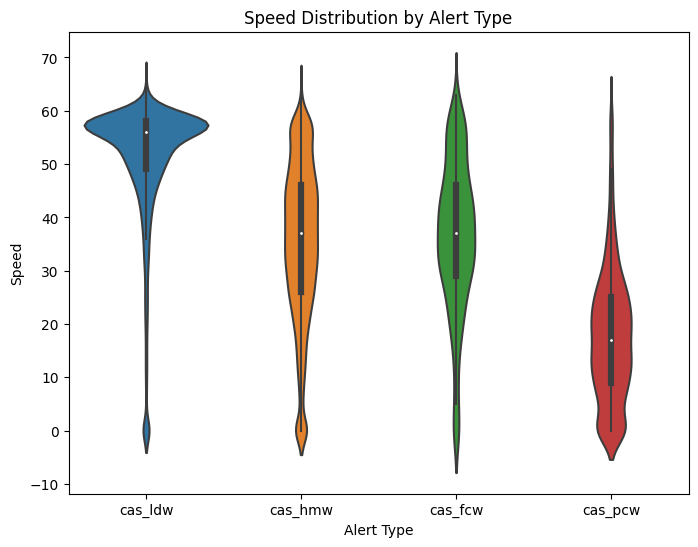

In [17]:
summary = df.groupby('Alert')['Speed'].describe()
print(summary)
# Create a box plot to visualize speed distribution by alert type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Alert', y='Speed', data=df)
plt.xlabel('Alert Type')
plt.ylabel('Speed')
plt.title('Speed Distribution by Alert Type')
plt.show()

# Create a violin plot to visualize speed distribution by alert type
plt.figure(figsize=(8, 6))
sns.violinplot(x='Alert', y='Speed', data=df)
plt.xlabel('Alert Type')
plt.ylabel('Speed')
plt.title('Speed Distribution by Alert Type')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0-2'),
  Text(1, 0, '2-4'),
  Text(2, 0, '4-6'),
  Text(3, 0, '6-8'),
  Text(4, 0, '8-10'),
  Text(5, 0, '10-12'),
  Text(6, 0, '12-14'),
  Text(7, 0, '14-16'),
  Text(8, 0, '16-18'),
  Text(9, 0, '18-20'),
  Text(10, 0, '20-22'),
  Text(11, 0, '22-24')])

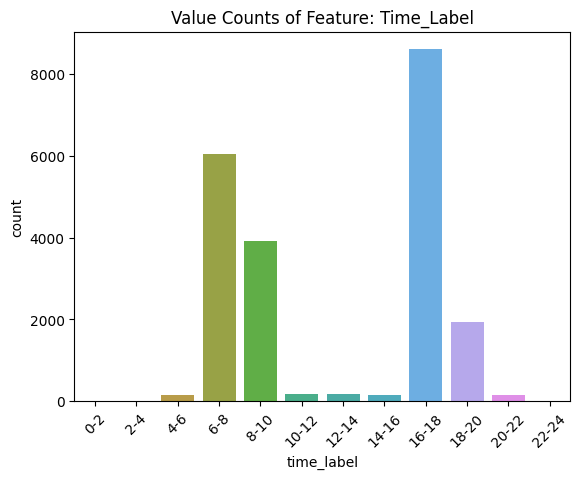

In [18]:
sns.countplot(x=df["time_label"])
plt.title("Value Counts of Feature: Time_Label")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Wednesday'),
  Text(1, 0, 'Thursday'),
  Text(2, 0, 'Friday'),
  Text(3, 0, 'Saturday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Sunday')])

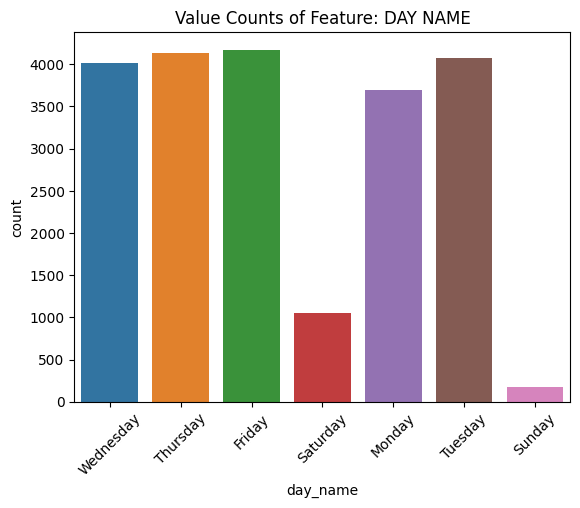

In [19]:
sns.countplot(x=df["day_name"])
plt.title("Value Counts of Feature: DAY NAME")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'cas_ldw'),
  Text(1, 0, 'cas_hmw'),
  Text(2, 0, 'cas_fcw'),
  Text(3, 0, 'cas_pcw')])

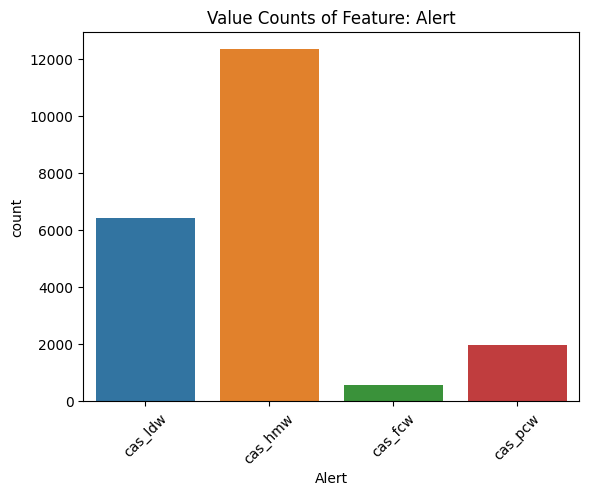

In [26]:
sns.countplot(x=df["Alert"])
plt.title("Value Counts of Feature: Alert")
plt.xticks(rotation=45)

In [27]:
df['Alert'].value_counts()

Alert
cas_hmw    12328
cas_ldw     6431
cas_pcw     1976
cas_fcw      590
Name: count, dtype: int64

In [20]:
#Hypothesis Testing
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
df5=df.copy()

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'Alert' column
df5['Alertnum'] = label_encoder.fit_transform(df5['Alert'])
# Subset 1: Data in the city with speed between 30-40
subset1 = df5[((df5['cluster'] == 0) | (df5['cluster']==1)) & ((df5['Speed'] >= 30) & (df5['Speed'] <= 40))]
alerts1 = subset1['Alertnum']

# Subset 2: Data in the city with speed not between 30-40
subset2 = df5[((df5['cluster'] == 0) | (df5['cluster']==1)) & ((df5['Speed'] < 30) | (df5['Speed'] > 40))]
alerts2 = subset2['Alertnum']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(alerts1, alerts2, equal_var=False)  # Assuming unequal variances

# Define significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of alerts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of alerts.")


Reject the null hypothesis. There is a significant difference in the number of alerts.


In [ ]:
#Cluster Characteristics

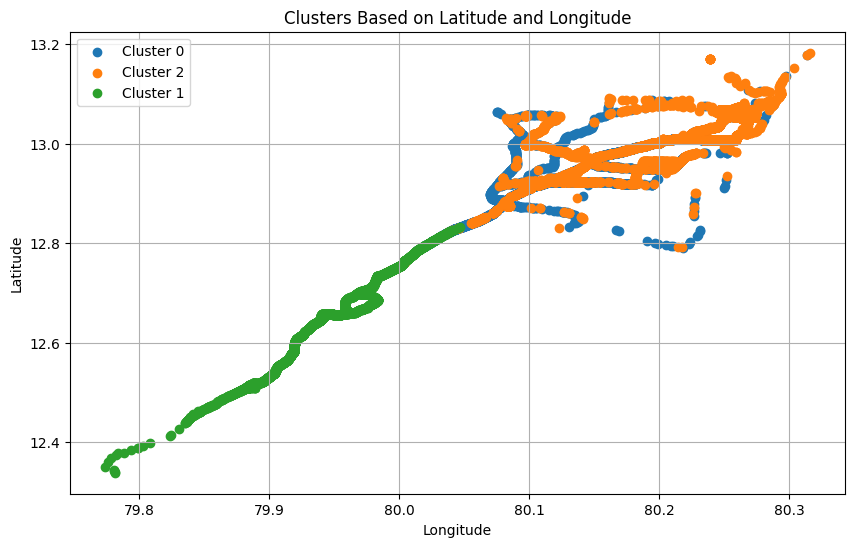

In [24]:
plt.figure(figsize=(10, 6))
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['Long'], cluster_data['Lat'], label=f'Cluster {cluster_id}')

plt.title('Clusters Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [21]:

cluster_groups = df.groupby('cluster')

# Define a function to calculate summary statistics for a given cluster
def calculate_summary_stats(cluster_data):
    summary_stats = {
        'Cluster Size': len(cluster_data),
        'Mean Speed': cluster_data['Speed'].mean(),
        'Median Speed': cluster_data['Speed'].median(),
        'Std Deviation Speed': cluster_data['Speed'].std(),
        'Min Speed': cluster_data['Speed'].min(),
        'Max Speed': cluster_data['Speed'].max(),
        'Mean Latitude': cluster_data['Lat'].mean(),
        'Mean Longitude': cluster_data['Long'].mean(),
        # Add more summary statistics as needed for your dataset
    }
    return summary_stats

# Calculate and store summary statistics for each cluster
cluster_summaries = {}
for cluster_id, cluster_data in cluster_groups:
    cluster_summary = calculate_summary_stats(cluster_data)
    cluster_summaries[f'Cluster {cluster_id}'] = cluster_summary

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(cluster_summaries).T

# Display the summary statistics
print(summary_df)

           Cluster Size  Mean Speed  Median Speed  Std Deviation Speed  \
Cluster 0        9085.0   47.920418          48.0             7.990840   
Cluster 1        4419.0   48.600588          56.0            14.314865   
Cluster 2        7821.0   21.587904          24.0            11.716225   

           Min Speed  Max Speed  Mean Latitude  Mean Longitude  
Cluster 0       21.0       65.0      12.937985       80.131912  
Cluster 1        0.0       64.0      12.651024       79.950059  
Cluster 2        0.0       51.0      12.997800       80.198183  


In [22]:
cluster_alert_counts = df.groupby(['cluster', 'Alert'])['Alert'].count().unstack(fill_value=0)

# Identify the most common alert type(s) in each cluster
common_alerts = cluster_alert_counts.idxmax(axis=1)

# Display the results
print(common_alerts)

cluster
0    cas_hmw
1    cas_ldw
2    cas_hmw
dtype: object


(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

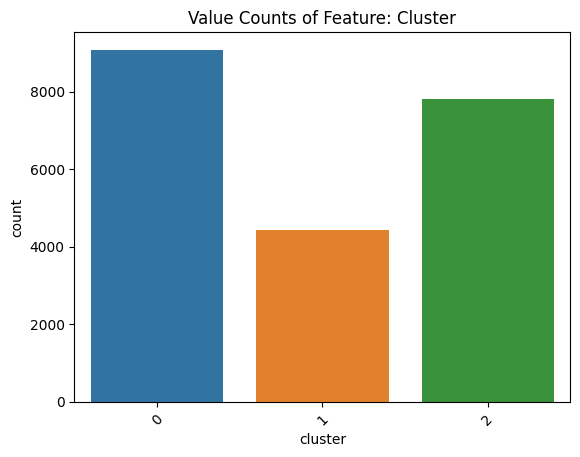

In [23]:
sns.countplot(x=df["cluster"])
plt.title("Value Counts of Feature: Cluster")
plt.xticks(rotation=45)

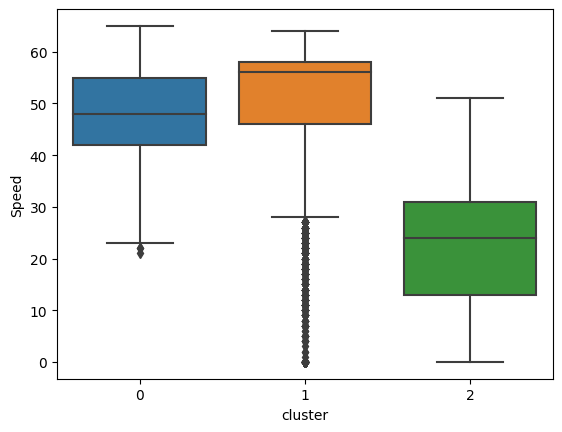

In [25]:
sns.boxplot(x='cluster', y='Speed', data=df)
plt.show()